# ⬇️Step 1: Import Essential Libraries
<hr>

In [326]:
import numpy as np              
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns  

# 🚚Step 2: Load cleaned Dataset
<hr>

In [327]:
df = pd.read_csv('cleaned_student_performance.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Tutoring_Sessions_Group
0,23,84,0,2,0,7,73,0,1,0,1,2,3,0,0,2,67,0
1,19,64,0,1,0,8,59,0,1,1,1,0,4,0,1,1,61,2
2,24,98,1,1,1,7,91,1,1,1,1,1,4,0,2,2,74,2
3,29,89,0,1,1,8,98,1,1,1,1,0,4,0,0,1,71,1
4,19,92,1,1,1,6,65,1,1,1,2,1,4,0,1,2,70,3


# 🩺Step03: Understand Data frame
<hr>

In [328]:
df.shape

(6600, 18)

In [329]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score',
       'Tutoring_Sessions_Group'],
      dtype='object')

In [330]:
df.Exam_Score.value_counts()

Exam_Score
68     759
66     751
67     716
65     677
69     624
70     541
64     501
71     408
63     370
72     304
62     263
61     171
73     141
74     106
60      77
75      48
59      40
58      22
76      16
80       5
77       5
57       4
82       4
94       4
86       4
78       4
84       3
98       3
97       3
89       3
79       3
88       3
93       2
92       2
99       2
87       2
95       2
85       1
91       1
96       1
100      1
83       1
55       1
56       1
Name: count, dtype: int64

# 🛠️Step 4: Feature Eng
<hr>

In [331]:
df['Exam_Score'].min()

55

In [332]:
def assign_grade(score):
    if score >= 75:
        return '3'
    elif score >= 69:
        return '3'
    elif score >= 66:
        return '2'
    elif score >= 60:
        return '1'
    elif score >= 55:
        return '1'
    else:
        return '1'

df['Grade'] = df['Exam_Score'].apply(assign_grade)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Tutoring_Sessions_Group,Grade
0,23,84,0,2,0,7,73,0,1,0,1,2,3,0,0,2,67,0,2
1,19,64,0,1,0,8,59,0,1,1,1,0,4,0,1,1,61,2,1
2,24,98,1,1,1,7,91,1,1,1,1,1,4,0,2,2,74,2,3
3,29,89,0,1,1,8,98,1,1,1,1,0,4,0,0,1,71,1,3
4,19,92,1,1,1,6,65,1,1,1,2,1,4,0,1,2,70,3,3


In [333]:
df["Grade"].value_counts()

Grade
3    2247
2    2226
1    2127
Name: count, dtype: int64

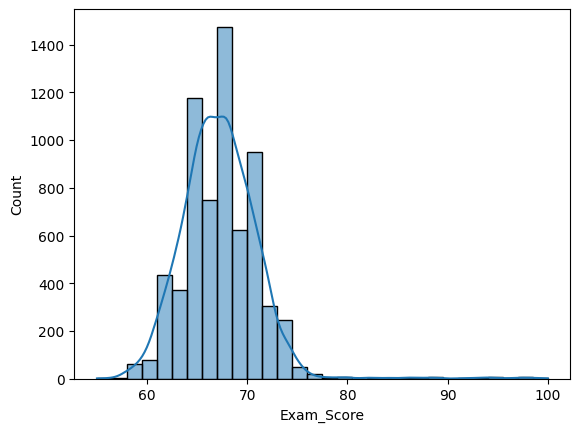

In [334]:
sns.histplot(df['Exam_Score'], bins=30, kde=True)
plt.show()

In [335]:
df.drop(columns=['Exam_Score'], inplace=True)

# 🤖Step 5: Modeling
<hr>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [337]:
X = df.drop(['Grade'], axis=1) 
y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <span style="color:gold; font-weight:bold">01. Logistic Regression</span>

In [339]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.9553030303030303

Confusion Matrix:
 [[431  16   0]
 [ 12 414   9]
 [  6  16 416]]

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       447
           2       0.93      0.95      0.94       435
           3       0.98      0.95      0.96       438

    accuracy                           0.96      1320
   macro avg       0.96      0.96      0.96      1320
weighted avg       0.96      0.96      0.96      1320



### <span style="color:gold; font-weight:bold">02. Random Forest classifier</span>

In [340]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,    
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  
)
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.8159

Confusion Matrix:
 [[384  63   0]
 [ 53 331  51]
 [  7  69 362]]

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86       447
           2       0.71      0.76      0.74       435
           3       0.88      0.83      0.85       438

    accuracy                           0.82      1320
   macro avg       0.82      0.82      0.82      1320
weighted avg       0.82      0.82      0.82      1320



In [341]:
import joblib

# Save the models
joblib.dump(logreg, 'classification_model/logistic_regression_model.pkl')
joblib.dump(rf, 'classification_model/random_forest_model.pkl')

['classification_model/random_forest_model.pkl']